In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train_df = pd.read_csv('./input/train.csv', index_col=0)

bsmt_columns = ['SalePrice','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                   'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']
ground_columns = ['SalePrice','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea']

In [ ]:
# bsmt_df.groupby('BsmtCond').size()
# Fa      45
# Gd      65
# Po       2
# TA    1311

# bsmt_df.groupby('BsmtExposure').size()
# Av    221
# Gd    134
# Mn    114
# No    953

# bsmt_df.groupby('BsmtFinType1').size()
# ALQ    220
# BLQ    148
# GLQ    418
# LwQ     74
# Rec    133
# Unf    430

# bsmt_df.groupby('BsmtFinType2').size()
# ALQ      19
# BLQ      33
# GLQ      14
# LwQ      46
# Rec      54
# Unf    1256
# bsmt_df.groupby('BsmtQual').size()
# Ex    121
# Fa     35
# Gd    618
# TA    649

# df.loc[df['BsmtCond'].isnull(),'BsmtCond'] ='TA'
# df.loc[df['BsmtExposure'].isnull(),'BsmtExposure'] ='No'
# df.loc[df['BsmtFinType2'].isnull(),'BsmtFinType2'] ='Unf'
# df['BsmtExposure'].isnull().sum()

### 4.Âú∞‰∏ãÂª∫Á≠ë
- BsmtQualÔºàÂú∞‰∏ãÂÆ§ÁöÑÈ´òÂ∫¶Ôºâ: Height of the basement
- BsmtCondÔºàÂú∞‰∏ãÂÆ§ÁöÑ‰∏ÄËà¨Áä∂ÂÜµÔºâ: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1ÔºàÂú∞‰∏ãÂÆ§ÊàêÂìÅÂå∫ÁöÑË¥®ÈáèÔºâ: Quality of basement finished area
- BsmtFinSF1Ôºà1ÂûãÊàêÂìÅÂπ≥ÊñπËã±Â∞∫Ôºâ: Type 1 finished square feet
- BsmtFinType2ÔºàÁ¨¨‰∫å‰∏™ÊàêÂìÅÂå∫ÁöÑË¥®ÈáèÔºàÂ¶ÇÊûúÂ≠òÂú®ÔºâÔºâ: Quality of second finished area (if present)
- BsmtFinSF2Ôºà2ÂûãÊàêÂìÅÂπ≥ÊñπËã±Â∞∫Ôºâ: Type 2 finished square feet
- BsmtUnfSFÔºàÊú™ÂÆåÂ∑•ÁöÑÂú∞‰∏ãÂÆ§Èù¢ÁßØ/Âπ≥ÊñπËã±Â∞∫Ôºâ: Unfinished square feet of basement area
- TotalBsmtSFÔºàÊÄªËÆ°ÔºöÂú∞‰∏ãÂÆ§ÊÄªÈù¢ÁßØ/Âπ≥ÊñπËã±Â∞∫Ôºâ: Total square feet of basement area

In [84]:
bsmt_df = train_df.loc[:, bsmt_columns]
bsmt_df.head()

SalePrice BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
Id                                                                      
1      208500       Gd       TA           No          GLQ         706   
2      181500       Gd       TA           Gd          ALQ         978   
3      223500       Gd       TA           Mn          GLQ         486   
4      140000       TA       Gd           No          ALQ         216   
5      250000       Gd       TA           Av          GLQ         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
Id                                                   
1           Unf           0        150          856  
2           Unf           0        284         1262  
3           Unf           0        434          920  
4           Unf           0        540          756  
5           Unf           0        490         1145

In [85]:
###Êï∞ÊçÆÊØîËæÉÂùáË°°ÔºåÊó†Â§™Â§öÁº∫Â§±, objÂíåintÂûãÂêÑ‰∏ÄÂçä
bsmt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 10 columns):
SalePrice       1460 non-null int64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinSF1      1460 non-null int64
BsmtFinType2    1422 non-null object
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
dtypes: int64(5), object(5)
memory usage: 165.5+ KB


### 4-1. Âú∞‰∏ãÁâπÂæÅÂàÜÊûê1
- 1.Ëøô‰∏™GdÂä†‰∏äÂ∞±‰ºöÂæàË¥µÔºåÈ´òÂ∫¶Ë∂äÈ´òÔºå‰ª∑Ê†ºÊ∂®ÂπÖ‰πüË∂äË¥µÔºåÂ∫îËØ•ÊòØÊØîËæÉÈ´òÁ∫ßÁöÑ‰∏ÄÁßçÂú∞‰∏ãÂÆ§Ë¥®ÈáèÔºàÊêú‰∫Ü‰∏Ä‰∏ãÔºåGdÂ•ΩÂÉèÊòØÈò≤Ê∞¥Ôºâ
- 2.Ex‰πüÂæàÊòéÊòæÔºåÁúãÂêçÂ≠óÂ∫îËØ•ÊòØ‰ªÄ‰πàÊâ©ÂÖÖÔºåÊúâÂ∞±ÂæàË¥µÔºåÈ´òÂá∫ÂÖ∂‰ªñ‰∏ÄÂ§ßÊà™„ÄÇ„ÄÇ„ÄÇÁÆ°‰ªñÂë¢ÔºåÂèçÊ≠£ÂÅöÂæóË∂äÂ•ΩË∂äË¥µÂëó
- 3.FinTypeÈÇ£‰∏§‰∏™Â±ûÊÄßÔºåGLQ„ÄÅALQË¥µ‰∏Ä‰∫õÔºåUNFÁ¶ªÁæ§ÁÇπÂ§ö„ÄÇ„ÄÇ„ÄÇ


- Á±ªÂà´Â±ûÊÄßÁªü‰∏ÄÂÅöone-hotÂ§ÑÁêÜÔºö'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'

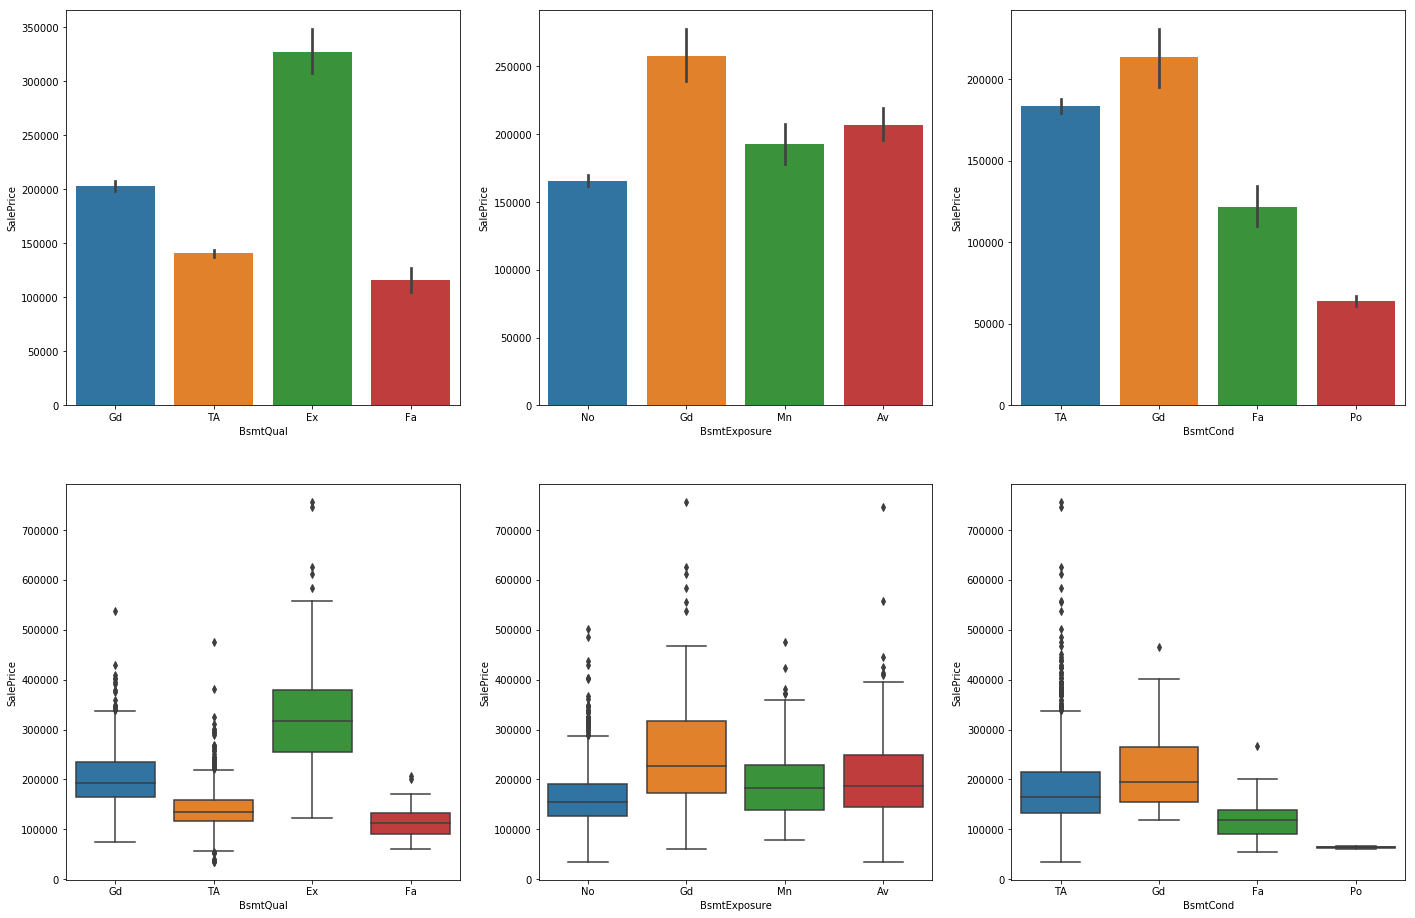

In [3]:
sns.set_context({"figure.figsize": (24, 16)})

plt.subplot2grid((2,3),(0,0))
sns.barplot(x='BsmtQual', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,3),(1,0))
sns.boxplot(x='BsmtQual', y='SalePrice', data=bsmt_df)


plt.subplot2grid((2,3),(0,1))
sns.barplot(x='BsmtExposure', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,3),(1,1))
sns.boxplot(x='BsmtExposure', y='SalePrice', data=bsmt_df)


plt.subplot2grid((2,3),(0,2))
sns.barplot(x='BsmtCond', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,3),(1,2))
sns.boxplot(x='BsmtCond', y='SalePrice', data=bsmt_df)



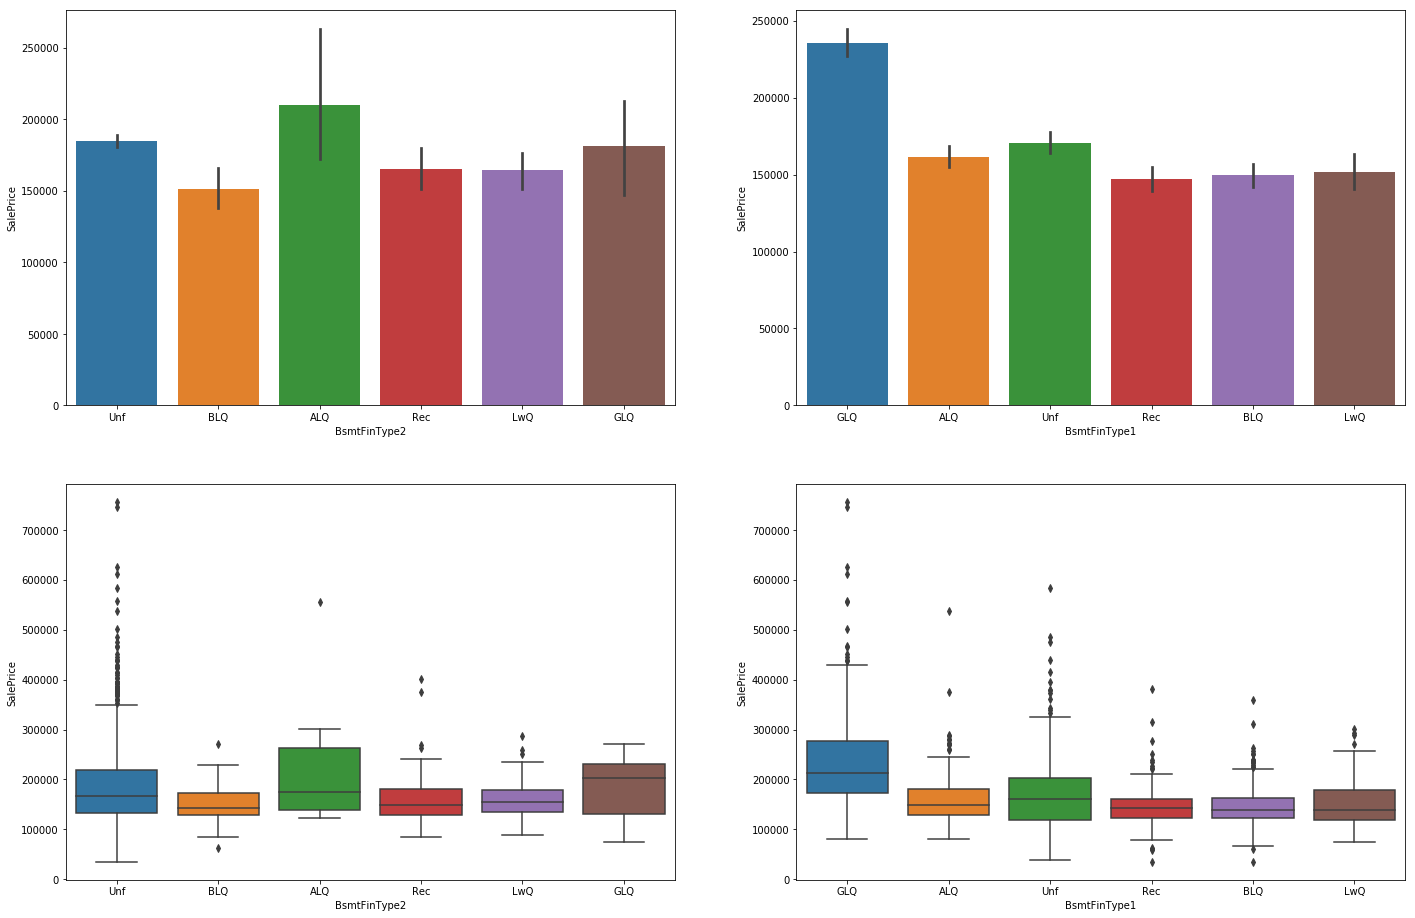

In [18]:
sns.set_context({"figure.figsize": (24, 16)})

plt.subplot2grid((2,2),(0,0))
sns.barplot(x='BsmtFinType2', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,2),(1,0))
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=bsmt_df)

plt.subplot2grid((2,2),(0,1))
sns.barplot(x='BsmtFinType1', y='SalePrice', data=bsmt_df)
plt.subplot2grid((2,2),(1,1))
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=bsmt_df)

### Âú∞‰∏ãÁâπÂæÅ-Êï∞ÂÄºÂ±ûÊÄß

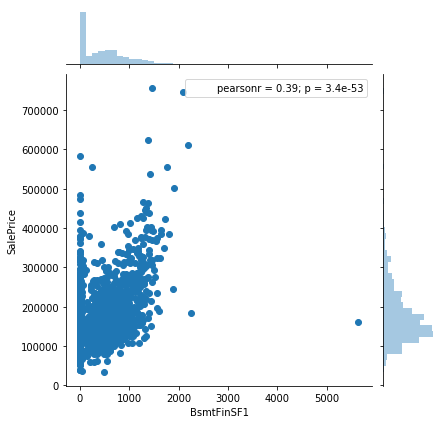

In [26]:
sns.set_context({"figure.figsize": (6, 6)})

sns.jointplot(x='BsmtFinSF1', y='SalePrice', data=bsmt_df)

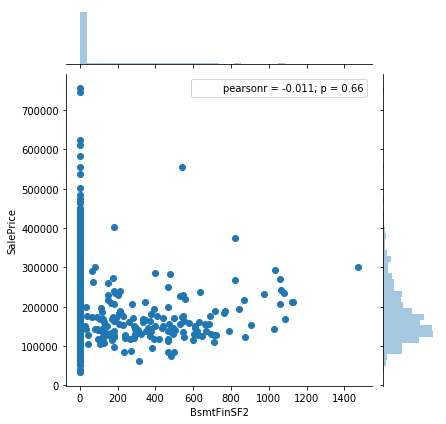

In [27]:
sns.jointplot(x='BsmtFinSF2', y='SalePrice', data=bsmt_df)

### 4-2 Âú∞‰∏ãÁâπÂæÅÂàÜÊûê2 
- Êï£ÁÇπÂõæ‰∏çÂ§üÊòéÊòæÔºå‰ΩÜÊòØ‰πüËÉΩÁúãÂá∫Êù•0ÂíåÂÖ∂‰ªñÁöÑÊòéÊòæÊúâÂå∫Âà´
- groupÊåâÂùáÂÄºÔºà‰∏≠‰ΩçÊï∞ÔºâÁúãÁúãÔºöËøôÊ¨°ÊòéÊòæ‰∫ÜÔºåÊåâÂàÜÂ∏ÉÂàÜÊ°∂(Êï∞Â≠óÂæÖÊ†°ÂáÜ)
- BsmtFinSF1Ôºö0 (0,1500) (1500,2200) >=2200
- BsmtFinSF2Ôºö0 (0,1100) >1100


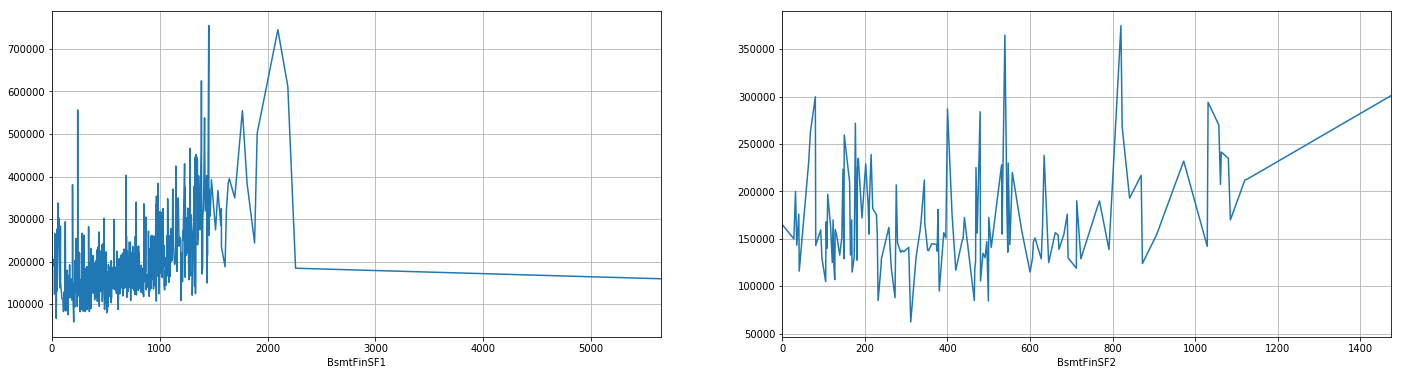

In [36]:
sns.set_context({"figure.figsize": (24, 6)})

plt.subplot2grid((1,2),(0,0))

bsmt_df.groupby('BsmtFinSF1').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((1,2),(0,1))
bsmt_df.groupby('BsmtFinSF2').agg(np.median)['SalePrice'].plot(grid=True)

###  Âú∞‰∏ãÁâπÂæÅÂàÜÊûê3ÔºåÂêåÊ†∑ÊñπÂºèÂàÜÊûêËøô‰∏§‰∏™Ôºö

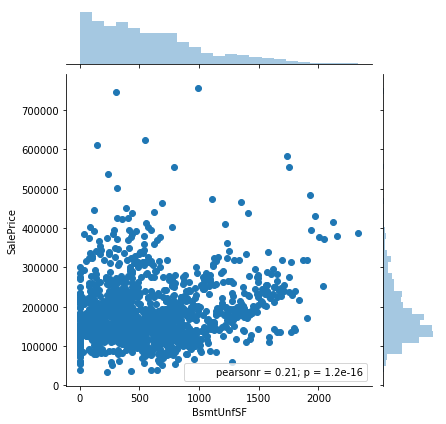

In [38]:
sns.set_context({"figure.figsize": (6, 6)})

sns.jointplot(x='BsmtUnfSF', y='SalePrice', data=bsmt_df)

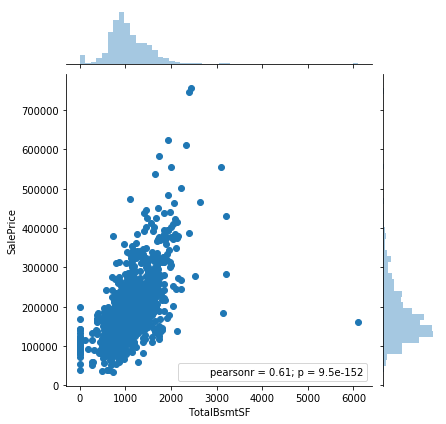

In [39]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data=bsmt_df)

### 4-3 Âú∞‰∏ãÁâπÂæÅÂàÜÊûê3
- BsmtUnfSFÂΩ±ÂìçÊòØÈÄêÊ∏êÈôç‰ΩéÔºåTotalBsmtSFÊòØÂÖàÂçáÂêéÈôçÔºåÂêåÊ†∑ÔºåÂÅöÂàÜÊ°∂
    - 'BsmtUnfSF': (0,1500) >1500
    - 'TotalBsmtSF': (0,500) (500,2000) (2000,3300) >3300

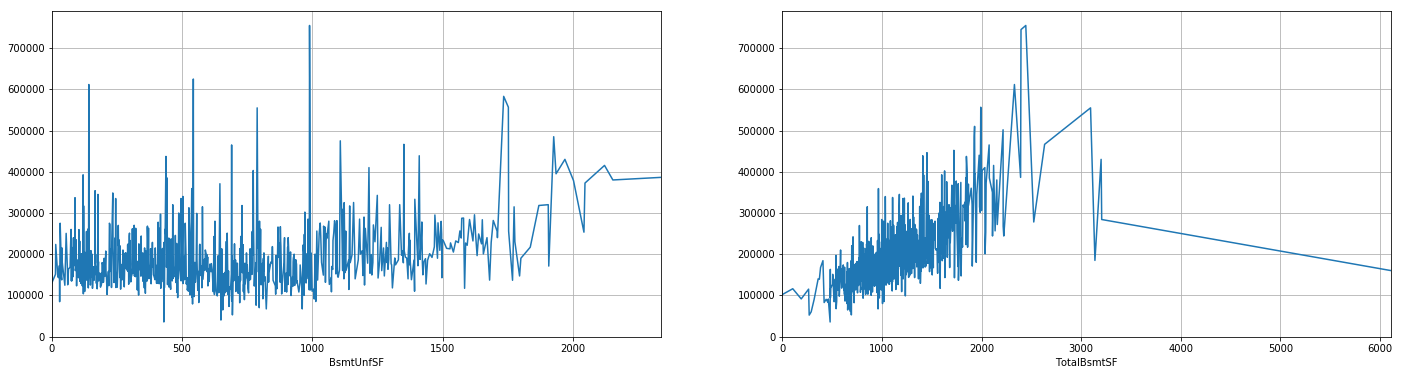

In [40]:
sns.set_context({"figure.figsize": (24, 6)})

plt.subplot2grid((1,2),(0,0))

bsmt_df.groupby('BsmtUnfSF').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((1,2),(0,1))
bsmt_df.groupby('TotalBsmtSF').agg(np.median)['SalePrice'].plot(grid=True)

### 5.Âú∞‰∏äÂª∫Á≠ë
- Âú∞‰∏äÂ±ûÊÄßËôΩÁÑ∂Â∞ëÔºå‰ΩÜÊòØËÇØÂÆöÂΩ±ÂìçÂæàÂ§ßÔºåüòÇÊØïÁ´üËøôÊâçÊòØÊàøÂ≠ê‰∏ª‰Ωì


- 1stFlrSFÔºà1Ê•ºÈù¢ÁßØ/Âπ≥ÊñπËã±Â∞∫Ôºâ: First Floor square feet
- 2ndFlrSFÔºà2Ê•ºÈù¢ÁßØ/Âπ≥ÊñπËã±Â∞∫Ôºâ: Second floor square feet
- LowQualFinSFÔºà‰ΩéË¥®ÈáèÁöÑÊàêÂìÅ/Âπ≥ÊñπËã±Â∞∫ÔºàÊâÄÊúâÊ•ºÂ±ÇÔºâÔºâ: Low quality finished square feet (all floors)
- GrLivAreaÔºàÂú∞‰∏äÂ±Ö‰ΩèÈù¢ÁßØ/Âπ≥ÊñπËã±Â∞∫Ôºâ: Above grade (ground) living area square feet





In [5]:
ground_df = train_df.loc[:, ground_columns]
ground_df.head()

SalePrice  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea
Id                                                        
1      208500       856       854             0       1710
2      181500      1262         0             0       1262
3      223500       920       866             0       1786
4      140000       961       756             0       1717
5      250000      1145      1053             0       2198

In [7]:
#ÂÆåÂÖ®Êó†Áº∫Â§±ÔºåÈÉΩÊòØÊï∞ÂÄºÂûãÊï∞ÊçÆ
ground_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
SalePrice       1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
LowQualFinSF    1460 non-null int64
GrLivArea       1460 non-null int64
dtypes: int64(5)
memory usage: 68.4 KB


### ÂâçËæπÊÑüËßâËøô‰∏™ÊäòÁ∫øÂõæÂØπÊï∞ÂÄºÁ±ªÂûãÂèòÂåñÊïàÊûúÂ•ΩÔºåÁõ¥Êé•‰∏äÊäòÁ∫øÂõæ

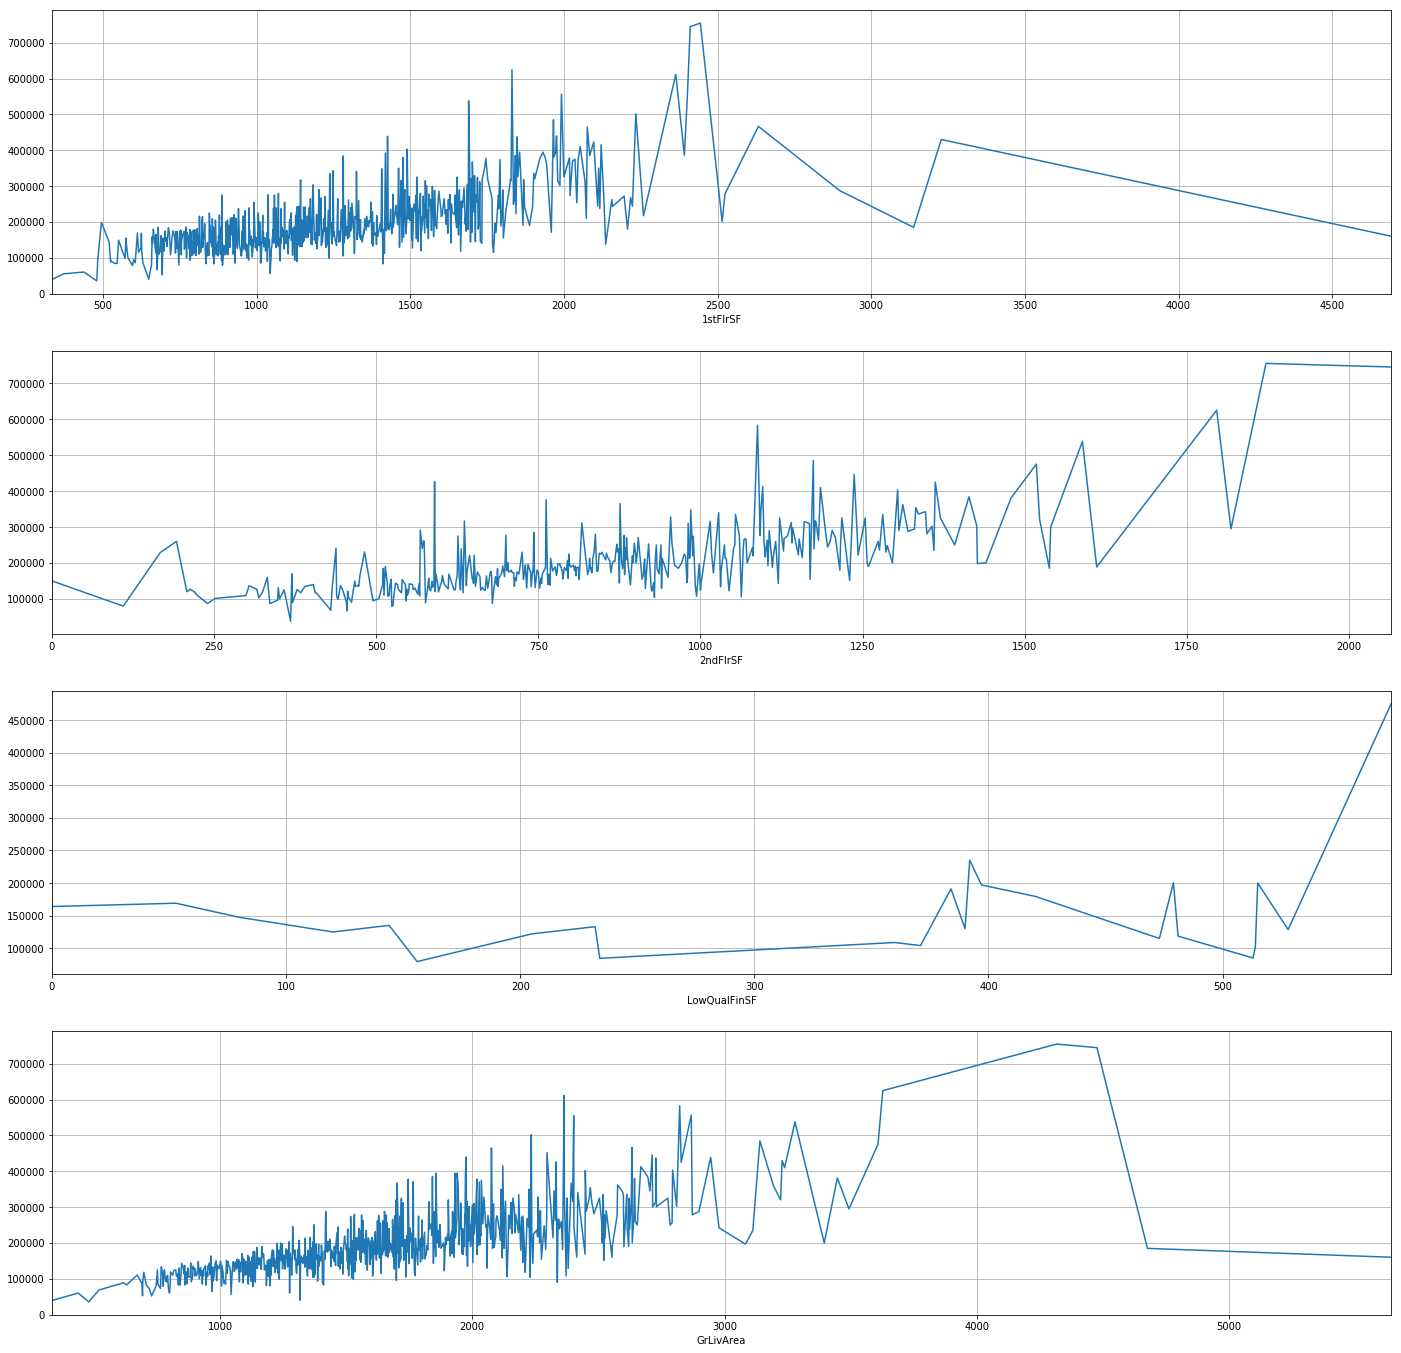

In [45]:
sns.set_context({"figure.figsize": (24, 24)})

plt.subplot2grid((4,1),(0,0))

ground_df.groupby('1stFlrSF').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((4,1),(1,0))
ground_df.groupby('2ndFlrSF').agg(np.median)['SalePrice'].plot(grid=True)

plt.subplot2grid((4,1),(2,0))
ground_df.groupby('LowQualFinSF').agg(np.median)['SalePrice'].plot(grid=True)

plt.subplot2grid((4,1),(3,0))
ground_df.groupby('GrLivArea').agg(np.median)['SalePrice'].plot(grid=True)

### ÂÜçÁî®Êï£ÁÇπÂõæÁúãÁúã

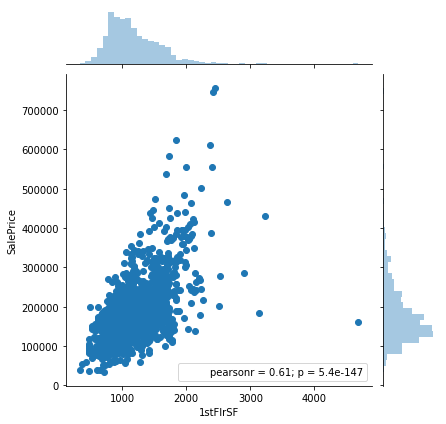

In [48]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=ground_df)



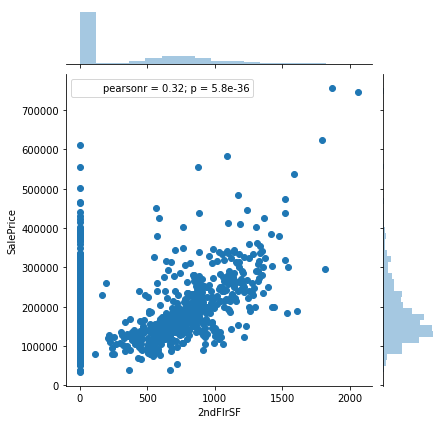

In [49]:
sns.jointplot(x='2ndFlrSF', y='SalePrice', data=ground_df)



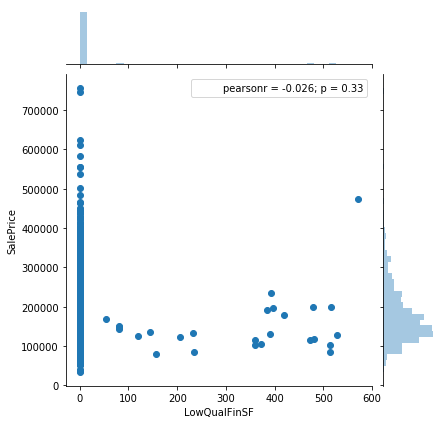

In [50]:
sns.jointplot(x='LowQualFinSF', y='SalePrice', data=ground_df)

# '','2ndFlrSF','',''

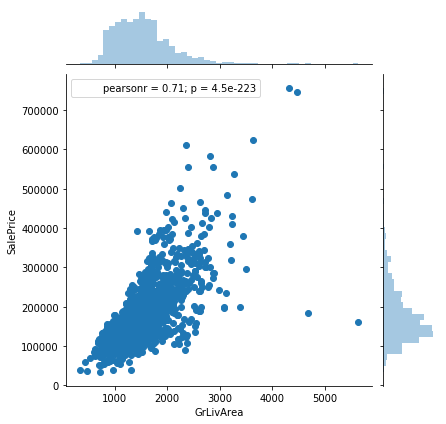

In [51]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=ground_df)



### Âú∞‰∏äÂª∫Á≠ëÂàÜÊûê
- 1.ËôΩÁÑ∂ÈÉΩÊòØÊ∂®Ôºå‰ΩÜÊòØÂ§ßÂà∞‰∏ÄÂÆöÈù¢ÁßØÔºå‰ª∑Ê†ºÊØîËæÉÂπ≥Á®≥‰∫ÜÔºåÁîöËá≥‰∏çÂçáÂèçÈôç
- 2.Â§™Â§ß‰∫Ü‰ª•ÂêéÔºå‰ΩéË¥®ÈáèÈù¢ÁßØÂºÄÂßã‰øùÊåÅÂπ≥Á®≥ÔºåÔºà500‰ª•‰∏äÔºâË∂äÂ§öË∂äË¥µÔºüÂ∫îËØ•ÊòØÊàøÂ≠êÂ§ß‰∫ÜË∂äË¥µÔºåÂ§ß‰∫Ü‰ΩéË¥®ÈáèÁöÑÂ∞±Â§ö‰∫ÜÔºü
- 3.Â§ßËá¥‰∏äÈÉΩÊòØÁ∫øÊÄßÂÖ≥Á≥ªÔºå‰ΩÜÊòØÊúâ‰∏Ä‰∫õÂô™Â£∞ÁÇπÂæóÊ≥®ÊÑèÔºåÊúâ‰∫õÊ≤°Êúâ2Ê•ºÔºå‰ΩéË¥®ÈáèËæÉÂ∞ëÁöÑ
- ÁªßÁª≠ÂàÜÊ°∂
    - '1stFlrSF', <400 (400,700) (700,2200) (2200,2500) (2500,3300) >3300
    - '2ndFlrSF', ==0 (0,100) (100,300) (300,500) (300,1400) (1400,1900) >1900
    - 'LowQualFinSF', ==0 Âíå !=0
    - 'GrLivArea' <500 (500,2700) (2700,3700) (3700,4700) >4700

# 4.Âú∞‰∏ãÂª∫Á≠ëÁâπÂæÅÂ§ÑÁêÜ
### 4-1. Âú∞‰∏ãÁâπÂæÅÂàÜÊûê1
- Á±ªÂà´Â±ûÊÄßÁªü‰∏ÄÂÅöone-hotÂ§ÑÁêÜÔºö'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'

### 4-2 Âú∞‰∏ãÁâπÂæÅÂàÜÊûê2 
- Êï£ÁÇπÂõæ‰∏çÂ§üÊòéÊòæÔºå‰ΩÜÊòØ‰πüËÉΩÁúãÂá∫Êù•0ÂíåÂÖ∂‰ªñÁöÑÊòéÊòæÊúâÂå∫Âà´
- groupÊåâÂùáÂÄºÔºà‰∏≠‰ΩçÊï∞ÔºâÁúãÁúãÔºöËøôÊ¨°ÊòéÊòæ‰∫ÜÔºåÊåâÂàÜÂ∏ÉÂàÜÊ°∂(Êï∞Â≠óÂæÖÊ†°ÂáÜ)
- BsmtFinSF1Ôºö0 != 0
- BsmtFinSF2Ôºö0 != 0
### 4-3 Âú∞‰∏ãÁâπÂæÅÂàÜÊûê3
    - 'BsmtUnfSF': (0,1500) >1500
    - 'TotalBsmtSF': (0,500) (500,2000) (2000,3300) >3300
    

# 5.Âú∞Èù¢Âª∫Á≠ëÁâπÂæÅÂ§ÑÁêÜ


- '1stFlrSF', <400 (400,700) (700,2200) (2200,2500) (2500,3300) >3300
- '2ndFlrSF', ==0 Âíå !=0
- 'LowQualFinSF', ==0 Âíå !=0
- 'GrLivArea' <500 (500,2700) (2700,3700) (3700,4700) >4700